**Data Cleaning in Machine learning**

Data cleaning, also known as data cleansing or data preprocessing, is a crucial step in the data science pipeline that involves identifying and correcting or removing errors, inconsistencies, and inaccuracies in the data to improve its quality and usability. Data cleaning is essential because raw data is often noisy, incomplete, and inconsistent, which can negatively impact the accuracy and reliability of the insights derived from it.





In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("/content/test.csv")

In [4]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


1. Data inspection and exploration:
This step involves understanding the data by inspecting its structure and identifying missing values, outliers, and inconsistencies.

Check the duplicate rows.

In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Check the categorical and numerical columns

In [8]:
# categoriacal coiumns
cat_col=[col for col in df.columns if df[col].dtype=='object']
print('Categorical columns :',cat_col)
#numerical columns
num_col=[col for col in df.columns if df[col].dtype !="object"]
print('Numerical columns:',num_col)

Categorical columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns: ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


Check the total number of unique values in the Categorical columns

In [9]:
df[cat_col].nunique()


Name        418
Sex           2
Ticket      363
Cabin        76
Embarked      3
dtype: int64

In [10]:
df.shape

(418, 11)

In [11]:
df['Ticket'].unique()[:50]

array(['330911', '363272', '240276', '315154', '3101298', '7538',
       '330972', '248738', '2657', 'A/4 48871', '349220', '694', '21228',
       '24065', 'W.E.P. 5734', 'SC/PARIS 2167', '233734', '2692',
       'STON/O2. 3101270', '2696', 'PC 17603', 'C 17368', 'PC 17598',
       'PC 17597', 'PC 17608', 'A/5. 3337', '113509', '2698', '113054',
       '2662', 'SC/AH 3085', 'C.A. 31029', 'C.A. 2315', 'W./C. 6607',
       '13236', '2682', '342712', '315087', '345768', '1601', '349256',
       '113778', 'SOTON/O.Q. 3101263', '237249', '11753',
       'STON/O 2. 3101291', 'PC 17594', '370374', '11813', 'C.A. 37671'],
      dtype=object)


 2. Removal of unwanted observations



In [18]:
df1= df.drop(columns=['Name','Ticket'])
df1.shape

(418, 9)

3. Handling missing data:

In [20]:

round((df1.isnull().sum()/df1.shape[0])*100,2)

PassengerId     0.00
Pclass          0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64

In [21]:

df2 = df1.drop(columns='Cabin')
df2.dropna(subset=['Embarked'], axis=0, inplace=True)
df2.shape

(418, 8)

Mean imputation is suitable when the data is normally distributed and has no extreme outliers.

In [22]:
# Mean imputation
df3 = df2.fillna(df2.Age.mean())
# Let's check the null values again
df3.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

4. Handling outliers:
Outliers are extreme values that deviate significantly from the majority of the data. They can negatively impact the analysis and model performance. Techniques such as clustering, interpolation, or transformation can be used to handle outliers.

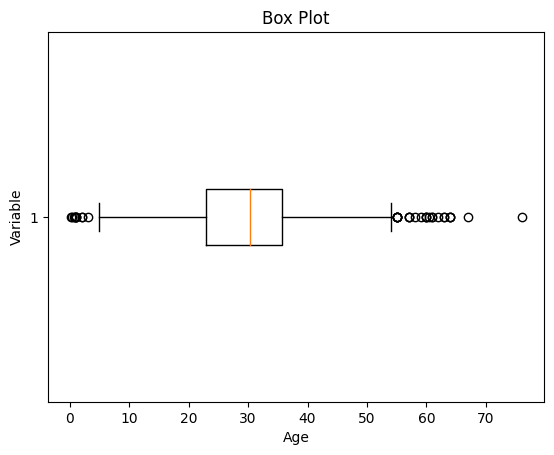

In [25]:

import matplotlib.pyplot as plt
plt.boxplot(df3['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [26]:

# calculate summary statistics
mean = df3['Age'].mean()
std  = df3['Age'].std()

# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)

# Drop the outliers
df4 = df3[(df3['Age'] >= lower_bound)
                & (df3['Age'] <= upper_bound)]

Lower Bound : 5.003522024795654
Upper Bound : 55.541658698095915


5. Data transformation

Data transformation involves converting the data from one form to another to make it more suitable for analysis. Techniques such as normalization, scaling, or encoding can be used to transform the data.

Scaling:


Scaling involves transforming the values of features to a specific range. It maintains the shape of the original distribution while changing the scale.
Scaling is particularly useful when features have different scales, and certain algorithms are sensitive to the magnitude of the features.
Common scaling methods include Min-Max scaling and Standardization (Z-score scaling).


> Min-Max Scaling:



Min-Max scaling rescales the values to a specified range, typically between 0 and 1.
It preserves the original distribution and ensures that the minimum value maps to 0 and the maximum value maps to 1.

In [28]:

from sklearn.preprocessing import MinMaxScaler

# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Numerical columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
# learning the statistical parameters for each of the data and transforming
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

<ipython-input-28-dfa92b60f47e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.452723,0.000,0.000000,0.015282,Q
1,1.0,female,0.617566,0.125,0.000000,0.013663,S
2,0.5,male,0.815377,0.000,0.000000,0.018909,Q
3,1.0,male,0.353818,0.000,0.000000,0.016908,S
4,1.0,female,0.287881,0.125,0.111111,0.023984,S


 In summary, data cleaning is a crucial step in the data science pipeline that involves identifying and correcting errors, inconsistencies, and inaccuracies in the data to improve its quality and usability. It involves various techniques such as handling missing data, handling outliers, data transformation, data integration, data validation and verification, and data formatting. The goal of data cleaning is to prepare the data for analysis and ensure that the insights derived from it are accurate and reliable.